In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
walmart=pd.read_csv("Walmart DataSet.csv")

In [ ]:
walmart.shape

(6435, 8)

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
walmart["Date"]=pd.to_datetime(walmart["Date"],format="%d-%m-%Y")
walmart['Year']=walmart['Date'].dt.year
walmart['Month']=walmart['Date'].dt.month
#walmart['Week']=walmart['Date'].dt.week

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 452.6 KB


In [ ]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
dtype: int64

In [ ]:
walmart.duplicated().sum()

0

In [ ]:
b=round(walmart['Weekly_Sales'].quantile(0.10),2)

In [ ]:
b

384125.46

##1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [ ]:
less_sales=walmart[walmart['Weekly_Sales']<b]['Store'].unique()
less_sales

array([ 3,  5,  7, 16, 30, 33, 36, 38, 44])

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

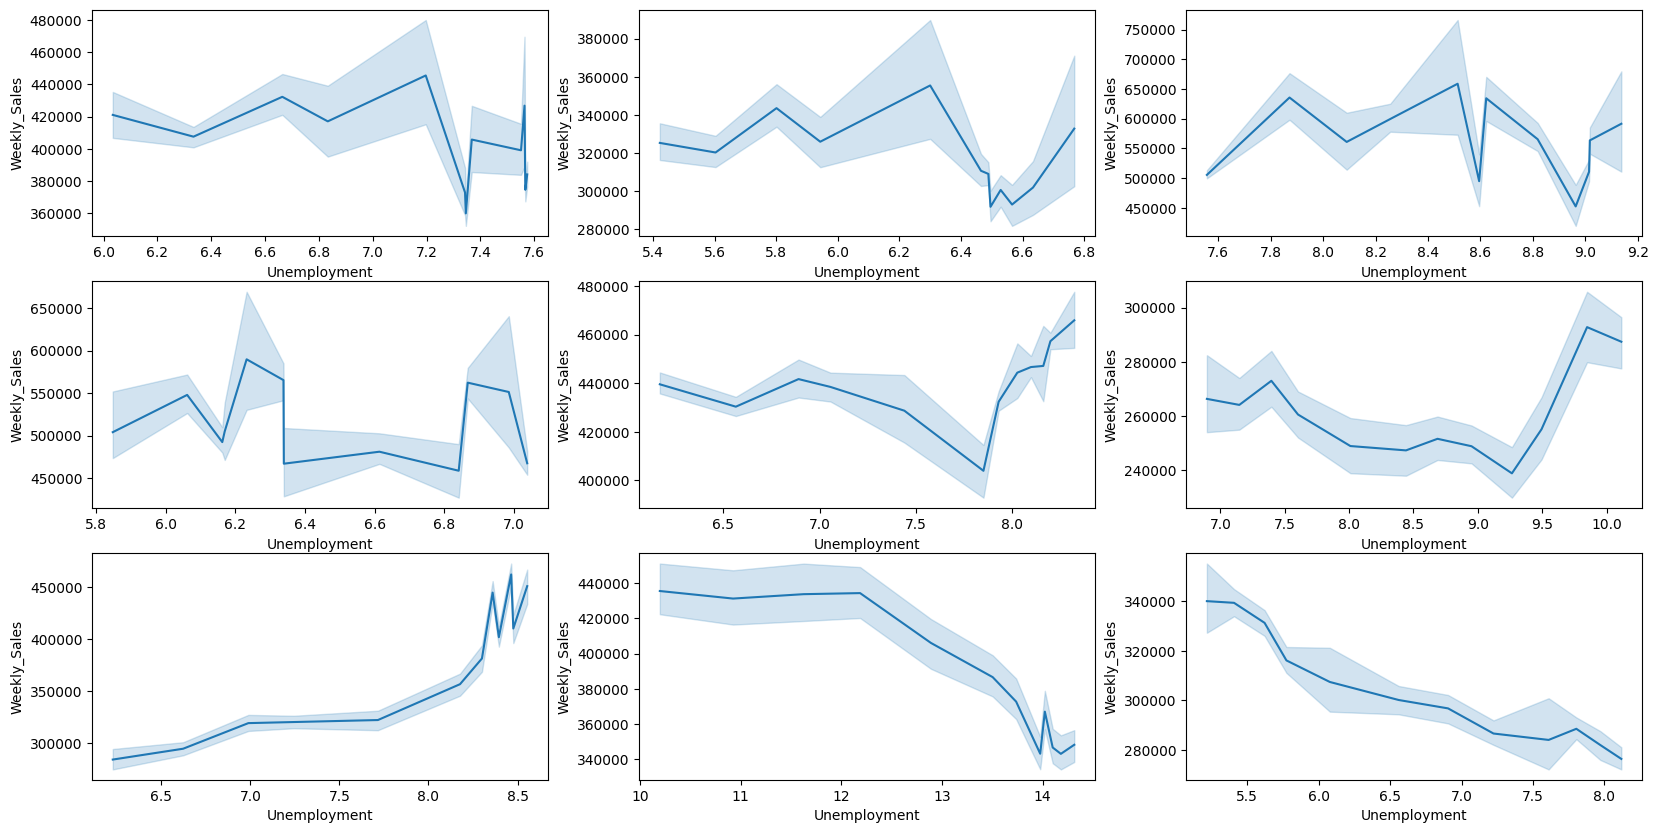

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.lineplot(data=walmart[walmart['Store']==3],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,2)
sns.lineplot(data=walmart[walmart['Store']==5],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,3)
sns.lineplot(data=walmart[walmart['Store']==7],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,4)
sns.lineplot(data=walmart[walmart['Store']==16],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,5)
sns.lineplot(data=walmart[walmart['Store']==30],x='Unemployment',y='Weekly_Sales')

plt.subplot(3,3,6)
sns.lineplot(data=walmart[walmart['Store']==33],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,7)
sns.lineplot(data=walmart[walmart['Store']==36],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,8)
sns.lineplot(data=walmart[walmart['Store']==38],x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,9)
sns.lineplot(data=walmart[walmart['Store']==44],x='Unemployment',y='Weekly_Sales')



**A**. Here we can see that store 38 and store 44 has high impact when unemployement increases sales decrease

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [ ]:
sale=walmart[['Date','Weekly_Sales']]
sale.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


<Axes: xlabel='Date', ylabel='Holiday_Flag'>

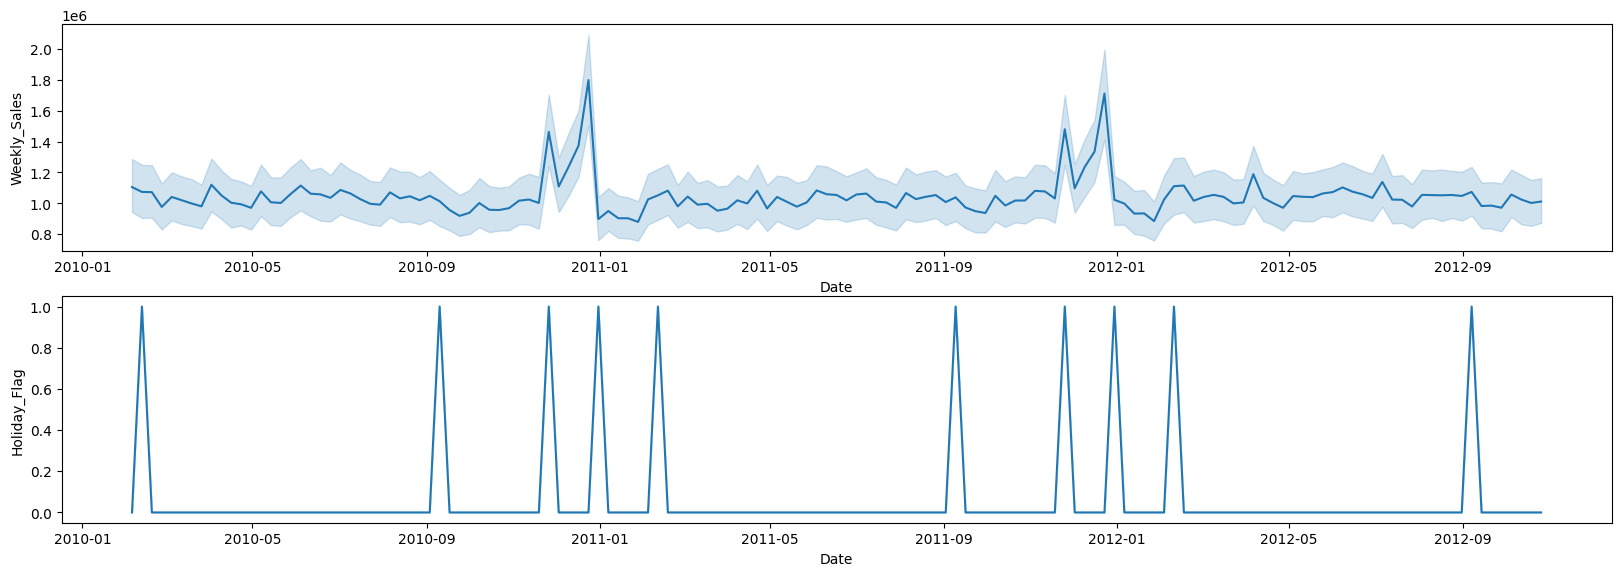

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.lineplot(data=sale,x='Date',y='Weekly_Sales')
plt.subplot(3,1,2)
sns.lineplot(data=walmart,x='Date',y='Holiday_Flag')

From above two graphs we found that at the end of each year there is increase in sales.It may due to festivals at the end of the year

### c. Does temperature affect the weekly sales in any manner?

<Axes: xlabel='Weekly_Sales', ylabel='Temperature'>

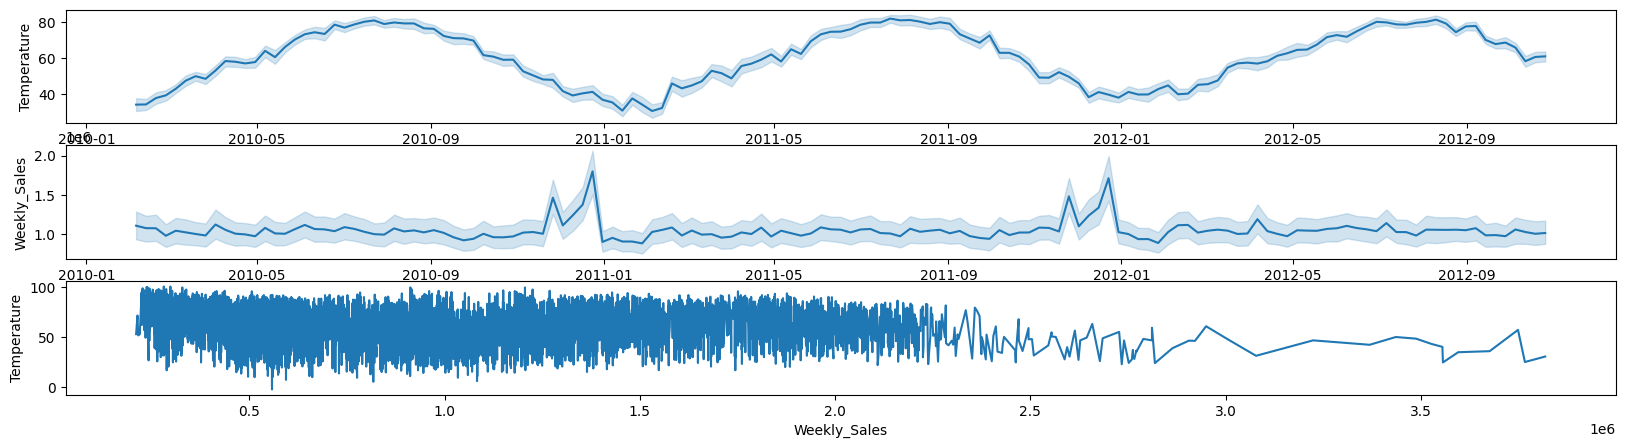

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(3,1,1)
sns.lineplot(data=walmart,x='Date',y='Temperature')
plt.subplot(3,1,2)
sns.lineplot(data=walmart,x='Date',y='Weekly_Sales')
plt.subplot(3,1,3)
sns.lineplot(data=walmart,x='Weekly_Sales',y='Temperature')

### d. How is the Consumer Price index affecting the weekly sales of various stores?

In [ ]:
cpi=walmart[['CPI','Weekly_Sales']]
cpi.head()

,CPI,Weekly_Sales
0,211.096358,1643690.90
1,211.242170,1641957.44
2,211.289143,1611968.17
3,211.319643,1409727.59
4,211.350143,1554806.68


<Axes: xlabel='Date', ylabel='CPI'>

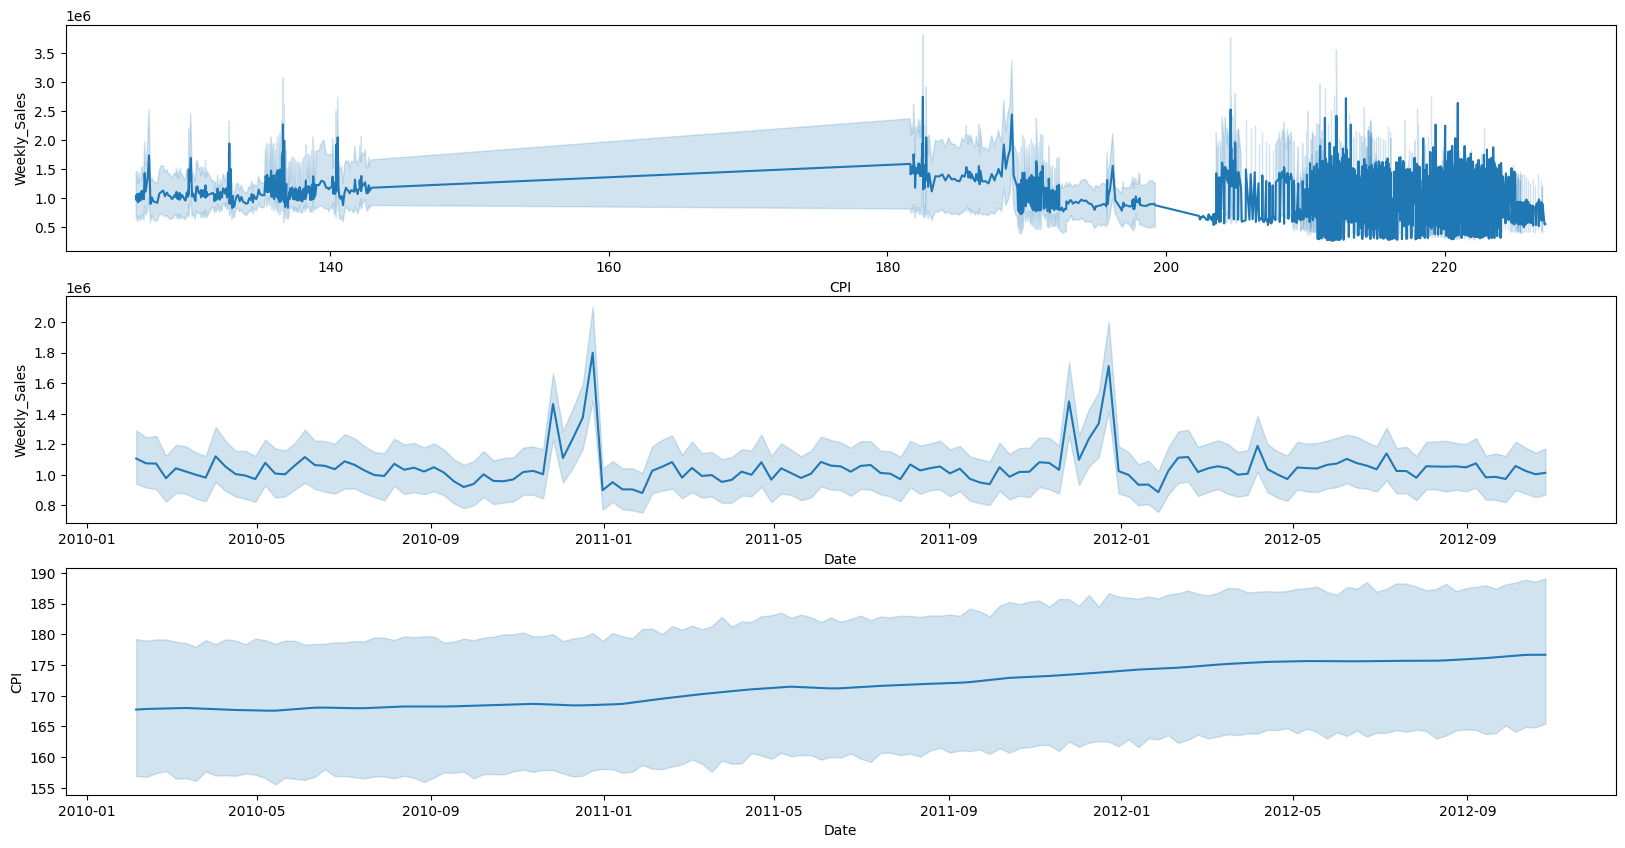

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.lineplot(data=cpi,x='CPI',y='Weekly_Sales')
plt.subplot(3,1,2)
sns.lineplot(data=walmart,x='Date',y='Weekly_Sales')
plt.subplot(3,1,3)
sns.lineplot(data=walmart,x='Date',y='CPI')

The CPI is increasing in the observed period of time.But there is no upward or downward by weekly_sales

### e. Top performing stores according to the historical data

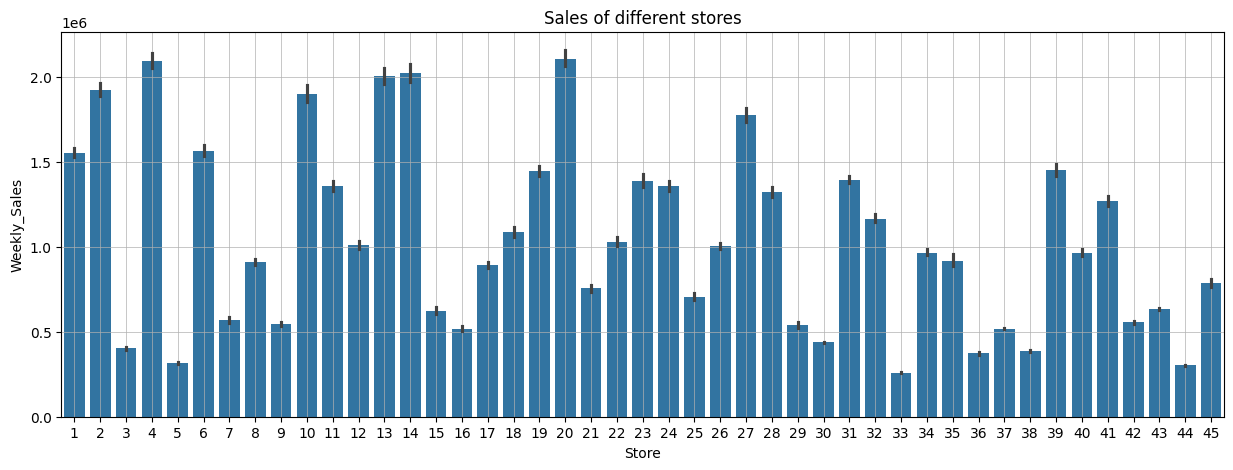

In [ ]:
# bar plot on sales for all stores
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=walmart)
plt.title('Sales of different stores')
plt.grid(linewidth=0.5)

In [ ]:
#top 10 best performed stores
ser=walmart.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=False)
print('Top 10 best performed stores:')
print(list(sorted_ser.index[:10]))

Top 10 best performed stores:
[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [ ]:
#top 10 best performed stores
ser=walmart.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=True)
print('List of 10 Worst performed stores:')
print(list(sorted_ser.index[:10]))

List of 10 Worst performed stores:
[33, 44, 5, 36, 38, 3, 30, 37, 16, 29]


In [ ]:
#significant is the difference between the highest and lowest performing stores.
highest_sale_of_a_store=walmart.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=False).values[0]
lowest_sale_of_a_store=walmart.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=True).values[0]

print('highest_sale_of_a_store:',np.round(highest_sale_of_a_store,2))
print('lowest_sale_of_a_store:',np.round(lowest_sale_of_a_store,2))
print('')
print('the difference between the highest and lowest performing stores: ')
print(np.round(highest_sale_of_a_store-lowest_sale_of_a_store,2))

highest_sale_of_a_store: 2107676.87
lowest_sale_of_a_store: 259861.69

the difference between the highest and lowest performing stores: 
1847815.18


## 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks






### Checking Outliers

In [ ]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [ ]:
walmart.index=walmart['Date']

In [ ]:
df=walmart

In [ ]:
df_week =df.resample('W').mean()
df_week

'''
dt.resample('W').mean() is using the pandas libraryin Python to resample a DataFrame dt
 by weekly frequency and calculate the mean of each week.
'''

"\ndt.resample('W').mean() is using the pandas libraryin Python to resample a DataFrame dt\n by weekly frequency and calculate the mean of each week.\n"

<Axes: xlabel='Date'>

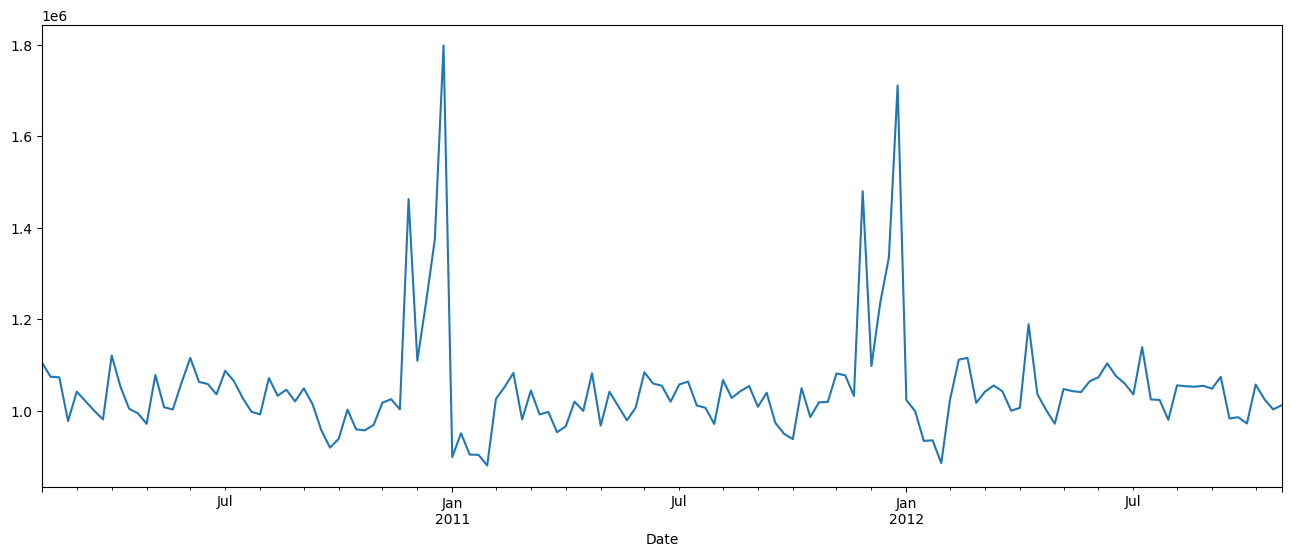

In [ ]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].fillna(int(df_week['Weekly_Sales'].mean()), inplace=True)
df_week['Weekly_Sales'].plot()

In [ ]:
# The data is not stationary, hence checking with rolling mean

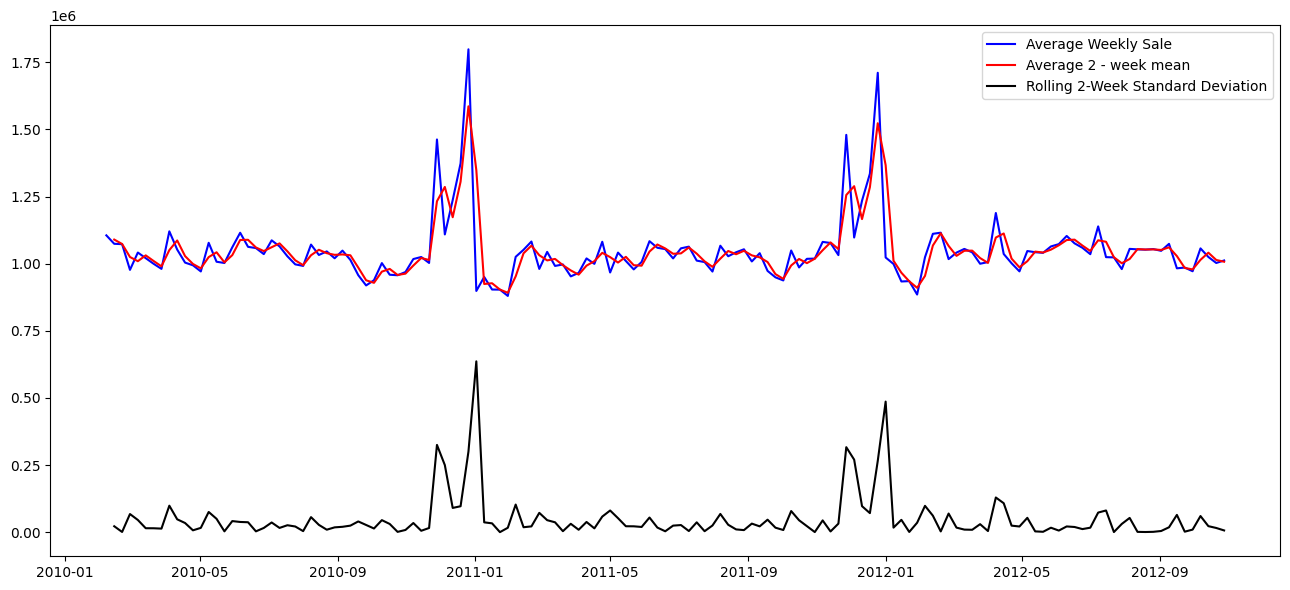

In [ ]:
roling_mean = df_week['Weekly_Sales'].rolling(window=2, center = False).mean()
roling_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

fig, ax = plt.subplots(figsize=(13,6))
ax.plot(df_week['Weekly_Sales'], color='blue', label= 'Average Weekly Sale')
ax.plot(roling_mean, color='red', label = 'Average 2 - week mean')
ax.plot(roling_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
roling_mean

Date
2010-02-07             NaN
2010-02-14    1.089860e+06
2010-02-21    1.073485e+06
2010-02-28    1.024951e+06
2010-03-07    1.009334e+06
                  ...     
2012-09-30    9.787716e+05
2012-10-07    1.014462e+06
2012-10-14    1.041057e+06
2012-10-21    1.013899e+06
2012-10-28    1.007406e+06
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
roling_std

Date
2010-02-07             NaN
2010-02-14    22219.854320
2010-02-21      937.841224
2010-02-28    67700.330490
2010-03-07    45614.659738
                  ...     
2012-09-30     9736.824393
2012-10-07    60209.983869
2012-10-14    22597.955158
2012-10-21    15809.394105
2012-10-28     6626.466095
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Weekly_Sales'])
result

(-4.624149498578306,
 0.00011655869699901148,
 34,
 6400,
 {'1%': -3.4313721757424656,
  '5%': -2.8619917128968813,
  '10%': -2.5670104435791017},
 171522.33418043077)

In [ ]:
p_value=result[1]
p_value

0.00011655869699901148

In [ ]:
#iterpret the p value
if p_value <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

Stationarity is present


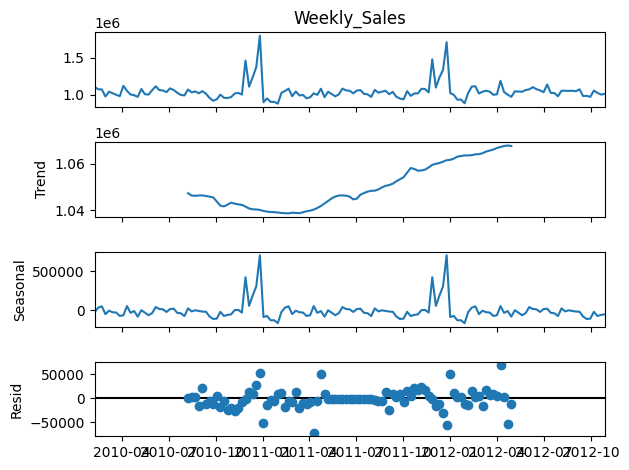

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_week['Weekly_Sales'].dropna())

decompose_result.plot();

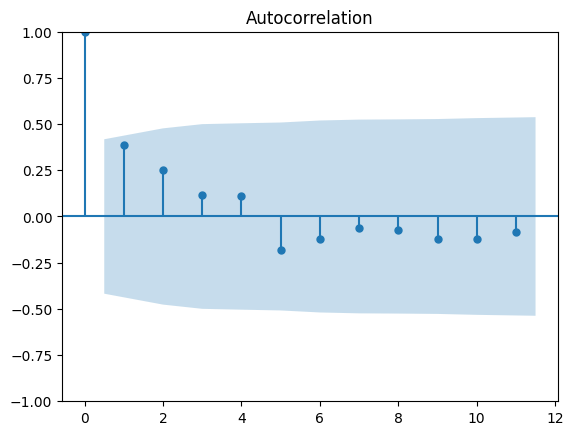

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(df_week["Weekly_Sales"])
plot_acf(acf_plot);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  #autoregressive intergrated moving averge

train = df_week.iloc[:120]['Weekly_Sales']
test = df_week.iloc[121:]['Weekly_Sales']

model = ARIMA(train, order=(1,0,2))  #(p,d,q),p=autoregressive,d=differencing,q=moving average
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1570.559
Date:                Sat, 04 May 2024   AIC                           3151.117
Time:                        13:07:58   BIC                           3165.055
Sample:                    02-07-2010   HQIC                          3156.778
                         - 05-20-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.048e+06   2.34e+04     44.707      0.000       1e+06    1.09e+06
ar.L1         -0.7332      0.097     -7.581      0.000      -0.923      -0.544
ma.L1          1.2126      0.094     12.938      0.000       1.029       1.396
ma.L2          0.5909      0.044     13.549      0.000       0.505       0.676
sigma2      1.528e+10      0.248   6.17e+10      0.000    1.53e+10    1.53e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               264.45
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               8.08   Skew:                             1.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.92e+25. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

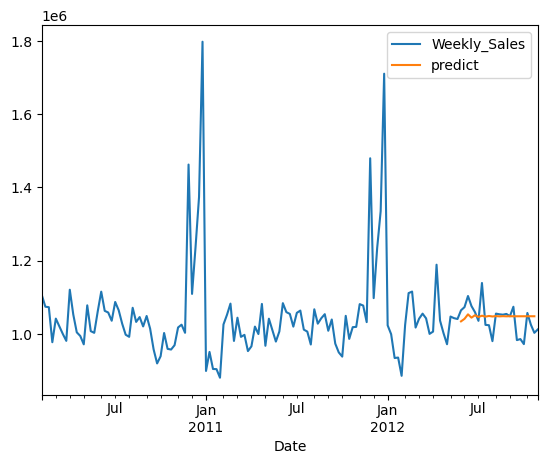

In [ ]:
df_week['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
df_week[['Weekly_Sales','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Date'>

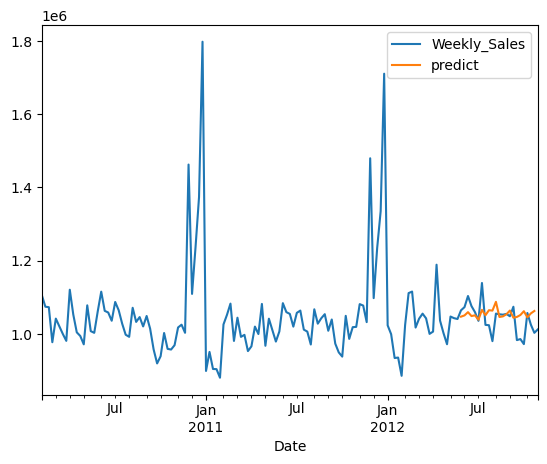

In [ ]:
df_week['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
df_week[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

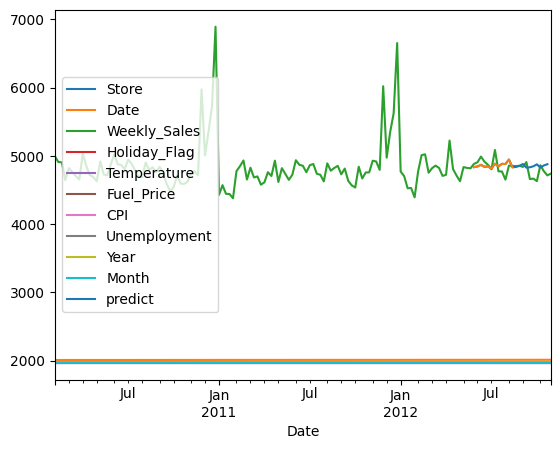

In [ ]:
#predicting the projections for the next 12 Weeks
forecast = model.forecast(steps=12)
df_week.plot()
forecast.plot()

In [ ]:
forecast

2012-05-27    1.046908e+06
2012-06-03    1.050355e+06
2012-06-10    1.059231e+06
2012-06-17    1.048544e+06
2012-06-24    1.050580e+06
2012-07-01    1.038604e+06
2012-07-08    1.065624e+06
2012-07-15    1.050816e+06
2012-07-22    1.064544e+06
2012-07-29    1.063476e+06
2012-08-05    1.087439e+06
2012-08-12    1.046084e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64